# Supervised Machine Learning Models - Random Forest Classification

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format

#### Random Forest

In the previous lectures, we estimated the probability of default using a logistic regression, and we estimated the CDS spread using a linear regression. In this lecture, we will adapt our code slightly to run a random forest classification model.

But before, we do, what is the random forest algorithm?

Random forest is a decision tree method. So let's start there. What is a decision tree?

#### Decision Trees

The best way to learn decision trees is with an example. Suppose you are a bank and your goal is to create a decision tree that predicts whether a customer will default on a loan.  What items might be relevant? You might think of many possible variables, but for simplicity, let's focus on just five:

1. Income
2. Credit Score
3. Payment History
4. Criminal Record
5. Years in Present Job

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether the customer has missed a prior payment or not), each branch represents the outcome of the test, and each leaf (or final) node represents the outcome after computing all previous attributes. The paths from root to leaf represent classification rules. A picture is literally worth a thousand words here:

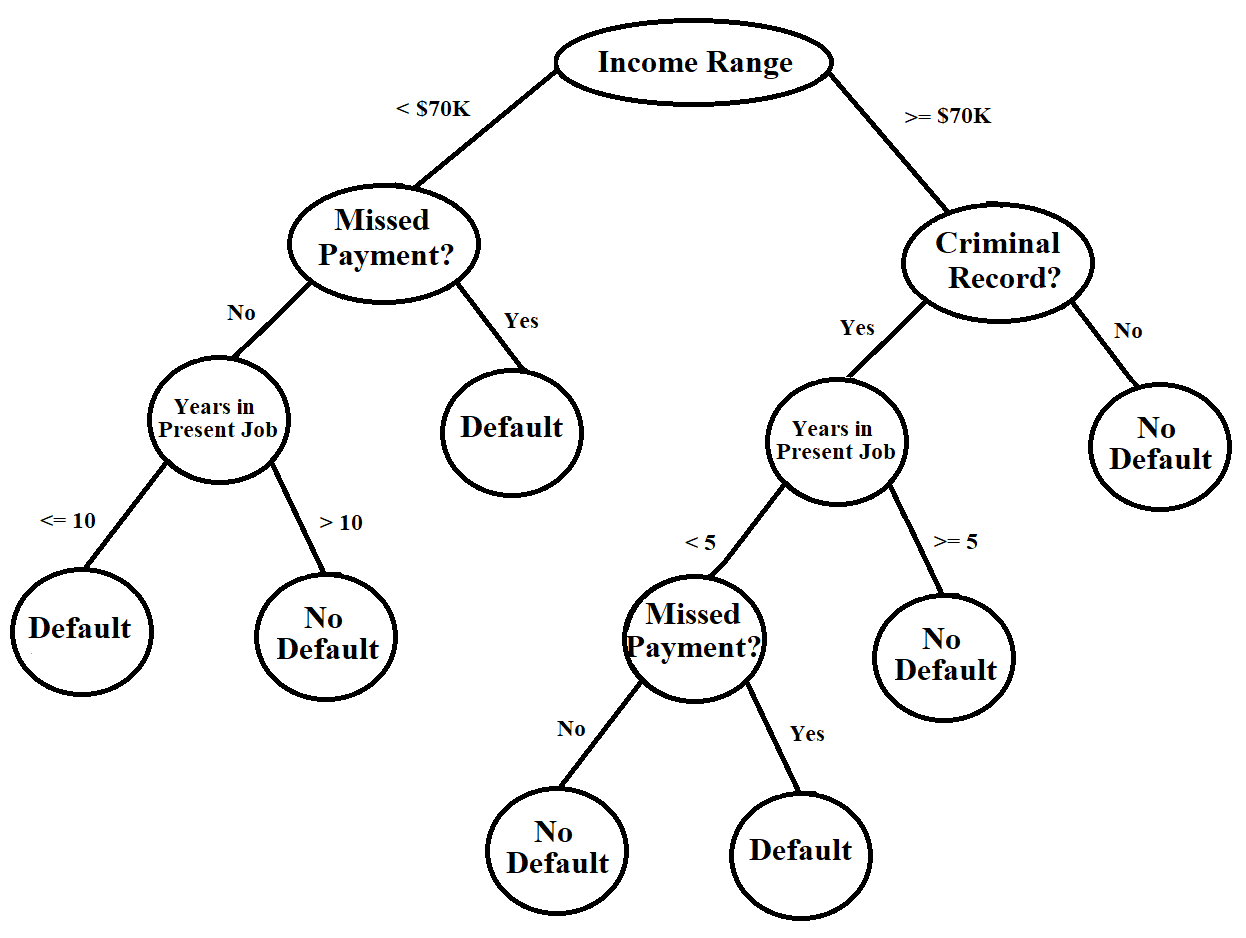

The machine learning algorithm for decision trees uses a process called binary recursive partitioning which essentially splits the data into subsets that minimize the error in the final nodes of the tree. For example, in the diagram above, the cutoffs are chosen to minimize the error of classifying default probability incorrectly.

As a concrete example, if you have income greater than or equal to \$70K, have a criminal record, have fewer than 5 years at your current job, but have not missed a prior payment, the algorithm predicts that you will not default on your loan.

#### Machine Learning and Overfitting

Now, before we move on to Random Forest, we first need to understand overfitting.

Overfitting is a common problem in machine learning where a model becomes too complex by fitting to the noise in the training data, rather than identifying the true underlying patterns in the data. This can lead to the model performing well on the training data but poorly on new, unseen data. 

Overfitting can occur for various reasons. One of the most common cases of overfitting occurs when a model is provided with too many independent variables. When this happens, the model may find spurious correlations between the independent variables and the dependent variable, leading to an overly complex model that performs well on the training data but poorly on new data.

Good machine learning algorithms employ techniques to reduce overfitting and improve out-of-sample predictive power. However, it is important to acknowledge that no machine learning model is perfect, and some level of overfitting is inevitable. As the British statistician George Box correctly stated, "All models are wrong, but some are useful."

#### Decision Trees to Random Forest

The random forest algorithm is named "forest" because it uses a collection of decision trees (i.e., a "forest") to reduce overfitting. How does creating many trees reduce overfitting? Here's the key: each tree uses only a random subset of the available independent variables (sometimes called **features**) and a subset of all available observations to create each tree. So, if an independent variable causes the model to overfit, the overall reliance on that independent variable is minimized because it is excluded from many of the trees.

The observations for each tree are drawn with replacement, a process known as **bootstrapping**, which just means that some observations will be used multiple times in a single tree. The idea is that by training each tree on different observations, although each tree might have high variance with respect to a particular set of the training data, overall, when aggregated, the entire forest will have lower variance and overfitting will be lessened.

Thus, the random forest algorithm requires that we choose a few specifications:

1. The number of trees (**n_estimator** option)
2. The maximum number of indpendent variables (**max_features** option)
3. Whether to use bootstrapping (**bootstrap** option)

#### Random Forest Classification

We'll now learn random forest classification (for categorical dependent variables), and in the next lecture, we'll learn random forest regression (for continuous dependent variables). Let's return to our bankruptcy data and use random forest classification to predict the likelihood of bankruptcy.

We'll first import the **default.csv** dataset we used in the previous lecture. As a reminder, this synthetic dataset contains data on companies that have and have not declared bankruptcy from 2002 to 2014. Our goal will be to create a machine learning algorithm that effectively predicts the likelihood that a company will file for bankruptcy within one year.

| Variable | Definition |
| --- | --- |
| gvkey | Firm identifier |
| datadate | Fiscal period end date |
| default | An indicator variable equal to 1 if the firm defaults (i.e., declares bankruptcy) within one year |
| ln_mve | The natural logarithm of market value of equity |
| btm | book-to-market ratio (book value of equity divided by market value of equity |
| retvol | return volatility (standard deviation of monthly stock returns over the previous 5 years) |
| ch_price | one-year percentage change in stock price |
| roa | return on assets (income before extraordinary items / assets) |
| lev | leverage ratio (total liabilities / total assets) |
| std_income | the standard deviation of quarterly income before extraordinary items over the previous 5 years |

In [ ]:
df = pd.read_csv('default.csv')
df.head()

To estimate the random forest classifier model, we import **RandomForestClassifier** from the **sklearn** module.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


As in the previous lecture, let's split our data into training and testing sets and specify the dependent and independent variables for the model.


In [ ]:
X = df[['ln_mve','btm','retvol','ch_price','roa','lev','std_income']]
y = df[['default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y) # Stratify=y makes it so that the mean of the dependent variable is the same in the training and testing sets

display(y_train.describe())
display(y_test.describe())

df.head()

Next, we select our options and fit the random forest classification model to the training data.

For this example, let's choose 1,000 trees (**n_estimators = 1000**), bootstrapping (**boostrap = True**), and use the square root of the number of available features in each tree (**max_features = 'sqrt'**).

In [ ]:
model = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features='sqrt', random_state=123456).fit(X_train,y_train.values.ravel())

Next, we can use our model to make predictions. 

Note: The **predict** function returns a 0 or 1 (equal to 1 if above 50% probability). If we want the actual predicted probability (between 0 and 1), we can use the **predict_proba** function instead.

In [ ]:
y_test['default_p'] = model.predict(X_test)
y_test.head()

Now, let's calculate accuracy, sensitivity, and specificity and compare to the logistic regression predictions. We can use the built-in **confusion_matrix** function to obtain the number of True Negatives, False Positives, False Negatives, and True Positives.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_test['default'], y_test['default_p']).ravel()

Accuracy = (TN + TP)/(TN + TP + FN + FP)
Sensitivity = TP/(TP + FN)
Specificity = TN/(TN + FP)

print(f'True Negative : {TN}')
print(f'True Positive : {TP}')
print(f'False Negative: {FN}')
print(f'False Positive: {FP}')

print()

print(f'Accuracy    : {Accuracy:.3f}')
print(f'Sensitivity : {Sensitivity:.3f}')
print(f'Specificity : {Specificity:.3f}')

We can see that across all three metrics, the random forest classifier performs better than the logistic regression that we ran in the previous lecture (though this may not always be the case).

Let's also evaluate the model by regressing the actual value on the prediction using logistic regression.

In [ ]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_test['default'], y_test[['default_p']].assign(_const=1)).fit()
print(logistic_model.summary())

#### Feature Importance

One nice additional test we can perform is called **feature importance**. Recall that "feature" is another way of saying "independent variable". Thus, with feature importance, we are attempting to identify the most important independent variables used in the model to predict the dependent variable. 

The **feature_importances_** function returns a weighting on each independent variable used in the random forest classification model. The weights sum to 1, so we can easily compare across the different weights to identify which independent variables were the most important in our model.

In [ ]:
feature_importance = pd.DataFrame({'feature': list(X_train.columns), 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending = False)
feature_importance

It appears that book-to-market ratio (**btm**) and leverage (**lev**) were the two most important features in our model.

#### Exercise

In this exercise you will return to the **WA_Fn-UseC_-HR-Employee-Attrition.csv** dataset to predict employee attrition that we used when learning logistic regression in a previous lecture. As a reminder, the data was obtained from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset and contains the following variables:

| Variable | Definition |
| --- | --- |
| Attrition | 'Yes' if the employee leaves the company, 'No' if the employee stays with the company |
| EmployeeNumber | Unique identifier for each employee |
| Age | Age in years of the employee |
| BusinessTravel | Frequency of business travel: 'Frequently', 'Rarely' or 'Non-Travel' |
| DailyRate | Daily rate of pay for the employee |
| Department | Department the employee belongs to: 'Sales', 'Research & Development' or 'Human Resources' |
| DistanceFromHome | Distance from employee's home to workplace |
| Education | Level of education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor' |
| EducationField | Field of study in which the employee obtained their highest education: 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Engineering', 'Arts', or 'Other' |
| EmployeeCount | Number of employees in the company |
| EnvironmentSatisfaction | Employee's level of satisfaction with their work environment: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' |
| Gender | Employee's gender: 'Male' or 'Female' |
| HourlyRate | Hourly rate of pay for the employee |
| JobInvolvement | Employee's level of job involvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' |
| JobLevel | Employee's job level: 1 'Entry Level', 2 'Intermediate Level', 3 'Managerial Level', 4 'Director Level', 5 'Executive Level' |
| JobRole | Employee's job role: 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources' |
| JobSatisfaction | Employee's level of job satisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' |
| MaritalStatus | Employee's marital status: 'Single', 'Married' or 'Divorced' |
| MonthlyIncome | Monthly income of the employee |
| MonthlyRate | Monthly rate of pay for the employee |
| NumCompaniesWorked | Number of companies the employee has worked for |
| Over18 | Whether the employee is over 18 years old: 'Y' or 'N' |
| OverTime | Whether the employee works overtime: 'Yes' or 'No' |
| PercentSalaryHike | Percentage increase in salary for the employee |
| PerformanceRating | Employee's performance rating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding' |
| RelationshipSatisfaction | Employee's level of satisfaction with their relationships at work: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' |
| StandardHours | Standard number of working hours for the company |
| StockOptionLevel | Employee's level of stock options: 0 'None', 1 'Low', 2 'Medium', 3 'High' |
| TotalWorkingYears | Total number of years the employee has worked |
| TrainingTimesLastYear | Number of times the employee received training last year |
| WorkLifeBalance | Employee's level of work-life balance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best' |
| YearsAtCompany | Number of years the employee has worked at the company |
| YearsInCurrentRole | Number of years the employee has been in their current role |
| YearsSinceLastPromotion | Number of years since the employee's last promotion |
| YearsWithCurrManager | Number of years the employee has been working under their current manager |

Use random forest classification to predict whether the employee will leave the company (i.e., **Attrition**) using all possible independent variables in the model. Train the model on a random sample of 75% of the observations in the dataset, and test the model on the remaining 25% of the observations in the dataset. How well did the model perform?